# Quick tutorial on how to generate gravitational waves parameters for Binary Neutron Star mergers for lensed and unlensed events

In [ ]:
## ler installation
## dodumentation: https://ler.readthedocs.io/en/latest/index.html
## GitHub: https://github.com/hemantaph/ler
# !pip install ler

## `ler` setup and initialization

In [1]:
from ler.rates import LeR

Setting multiprocessing start method to 'fork'


In [ ]:
ler = LeR(
    npool=6,
    event_type='BNS',
    waveform_approximant = 'IMRPhenomXPHM',
    snr_type = 'inner_product',
    spin_zero = False,
    spin_precession = True,
)

z_to_luminosity_distance interpolator will be loaded from ./interpolator_pickle/z_to_luminosity_distance/z_to_luminosity_distance_0.pickle
differential_comoving_volume interpolator will be loaded from ./interpolator_pickle/differential_comoving_volume/differential_comoving_volume_0.pickle
merger_rate_density interpolator will be loaded from ./interpolator_pickle/merger_rate_density/merger_rate_density_0.pickle
binary_masses_BNS_bimodal interpolator will be loaded from ./interpolator_pickle/binary_masses_BNS_bimodal/binary_masses_BNS_bimodal_0.pickle
z_to_Dc interpolator will be loaded from ./interpolator_pickle/z_to_Dc/z_to_Dc_0.pickle
Dc_to_z interpolator will be loaded from ./interpolator_pickle/Dc_to_z/Dc_to_z_0.pickle
angular_diameter_distance interpolator will be loaded from ./interpolator_pickle/angular_diameter_distance/angular_diameter_distance_0.pickle
differential_comoving_volume interpolator will be loaded from ./interpolator_pickle/differential_comoving_volume/differential_

## Unlensed parameters sampling 

### All parameters

In [31]:
ler.batch_size = 10000
unlensed_param = ler.unlensed_cbc_statistics(size=20000, resume=False)

unlensed params will be store in ./ler_data/unlensed_param.json
chosen batch size = 10000 with total size = 20000
There will be 2 batche(s)
Batch no. 1
sampling gw source params...
calculating snrs...
solving SNR with inner product


100%|████████████████████████████████████████████████████████| 10000/10000 [01:25<00:00, 116.82it/s]


Batch no. 2
sampling gw source params...
calculating snrs...
solving SNR with inner product


100%|████████████████████████████████████████████████████████| 10000/10000 [01:26<00:00, 115.77it/s]


saving all unlensed parameters in ./ler_data/unlensed_param.json 


In [32]:
unlensed_param.keys()

dict_keys(['zs', 'geocent_time', 'ra', 'dec', 'phase', 'psi', 'theta_jn', 'a_1', 'a_2', 'tilt_1', 'tilt_2', 'phi_12', 'phi_jl', 'luminosity_distance', 'mass_1_source', 'mass_2_source', 'mass_1', 'mass_2', 'L1', 'H1', 'V1', 'optimal_snr_net'])

### Detectable parameters and Event Rate

In [ ]:
unlensed_rate, unlensed_param_detectable = ler.unlensed_rate(snr_threshold=8)

Getting unlensed_param from json file ./ler_data/unlensed_param.json...
given detectability_condition == 'step_function'
total unlensed rate (yr^-1): 0.0
number of simulated unlensed detectable events: 0
number of simulated all unlensed events: 20000
storing detectable params in ./ler_data/unlensed_param_detectable.json


### Effective spin

In [44]:
import numpy as np

# spin and mass parameters
a_1 = unlensed_param['a_1']
a_2 = unlensed_param['a_2']
tilt_1 = unlensed_param['tilt_1']
tilt_2 = unlensed_param['tilt_2']
m1 = unlensed_param['mass_1_source']
m2 = unlensed_param['mass_2_source']

# Calculate effective spin
chi_eff = (
    (unlensed_param['mass_1_source'] * unlensed_param['a_1'] * np.cos(unlensed_param['tilt_1']) +
     unlensed_param['mass_2_source'] * unlensed_param['a_2'] * np.cos(unlensed_param['tilt_2'])) /
    (unlensed_param['mass_1_source'] + unlensed_param['mass_2_source'])
)

print("Effective Spin (χ_eff):", chi_eff)

Effective Spin (χ_eff): [-0.0129419   0.0198425   0.01227857 ... -0.00504107  0.01283324
 -0.0011884 ]


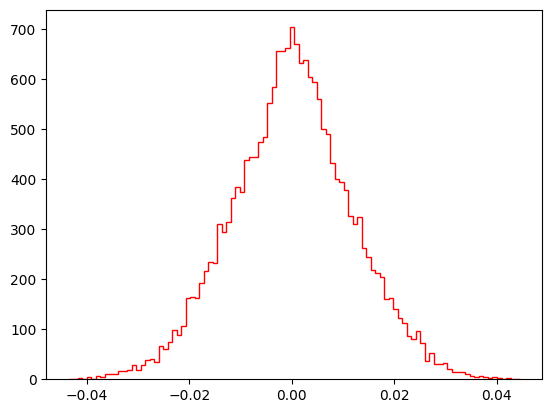

In [45]:
import matplotlib.pyplot as plt

plt.hist(chi_eff, bins=100, histtype='step', color='r', label='Lensed')
plt.show()

## Lensed parameters sampling

### All parameters

In [39]:
lensed_rate, lensed_param = ler.lensed_cbc_statistics(size=20000)

lensed params will be store in ./ler_data/lensed_param.json
chosen batch size = 10000 with total size = 20000
There will be 2 batche(s)
Batch no. 1
sampling lensed params...
solving lens equations...


100%|███████████████████████████████████████████████████████| 10000/10000 [00:02<00:00, 3664.00it/s]

calculating snrs...
solving SNR with inner product



100%|████████████████████████████████████████████████████████| 10000/10000 [01:11<00:00, 139.04it/s]

solving SNR with inner product



100%|████████████████████████████████████████████████████████| 10000/10000 [01:12<00:00, 137.31it/s]


solving SNR with inner product


100%|██████████████████████████████████████████████████████████| 1248/1248 [00:09<00:00, 137.00it/s]

solving SNR with inner product



100%|██████████████████████████████████████████████████████████| 1091/1091 [00:08<00:00, 134.74it/s]


Batch no. 2
sampling lensed params...
solving lens equations...


100%|███████████████████████████████████████████████████████| 10000/10000 [00:02<00:00, 3655.47it/s]

Invalid sample found. Resampling 1 lensed events...
solving lens equations...



100%|█████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.91it/s]

calculating snrs...
solving SNR with inner product



100%|████████████████████████████████████████████████████████| 10000/10000 [01:11<00:00, 139.19it/s]


solving SNR with inner product


100%|████████████████████████████████████████████████████████| 10000/10000 [01:11<00:00, 139.20it/s]


solving SNR with inner product


100%|██████████████████████████████████████████████████████████| 1314/1314 [00:09<00:00, 136.05it/s]

solving SNR with inner product



100%|██████████████████████████████████████████████████████████| 1163/1163 [00:08<00:00, 136.28it/s]


saving all lensed parameters in ./ler_data/lensed_param.json 


In [40]:
lensed_param.keys()

dict_keys(['zl', 'zs', 'sigma', 'q', 'theta_E', 'phi', 'e1', 'e2', 'gamma1', 'gamma2', 'gamma', 'geocent_time', 'ra', 'dec', 'phase', 'psi', 'theta_jn', 'a_1', 'a_2', 'tilt_1', 'tilt_2', 'phi_12', 'phi_jl', 'luminosity_distance', 'mass_1_source', 'mass_2_source', 'mass_1', 'mass_2', 'x0_image_positions', 'x1_image_positions', 'magnifications', 'time_delays', 'image_type', 'n_images', 'x_source', 'y_source', 'effective_luminosity_distance', 'effective_geocent_time', 'optimal_snr_net', 'L1', 'H1', 'V1'])

### Detectable parameters and event rate

In [41]:
_, lensed_param_detectable = ler.lensed_rate(snr_threshold=8, num_img=2)

Getting lensed_param from json file ./ler_data/lensed_param.json...
given detectability_condition == step_function
total lensed rate (yr^-1): 0.10018309906890076
number of simulated lensed detectable events: 2
number of simulated all lensed events: 20000
storing detectable params in ./ler_data/lensed_param_detectable.json


In [42]:
lensed_param_detectable.keys()

dict_keys(['zl', 'zs', 'sigma', 'q', 'theta_E', 'phi', 'e1', 'e2', 'gamma1', 'gamma2', 'gamma', 'geocent_time', 'ra', 'dec', 'phase', 'psi', 'theta_jn', 'a_1', 'a_2', 'tilt_1', 'tilt_2', 'phi_12', 'phi_jl', 'luminosity_distance', 'mass_1_source', 'mass_2_source', 'mass_1', 'mass_2', 'x0_image_positions', 'x1_image_positions', 'magnifications', 'time_delays', 'image_type', 'n_images', 'x_source', 'y_source', 'effective_luminosity_distance', 'effective_geocent_time', 'optimal_snr_net', 'L1', 'H1', 'V1'])

## Getting parameters from the stored json file

In [43]:
from ler.utils import get_param_from_json

lensed_param = get_param_from_json('./ler_data/lensed_param_detectable.json')
lensed_param.keys()

dict_keys(['zl', 'zs', 'sigma', 'q', 'theta_E', 'phi', 'e1', 'e2', 'gamma1', 'gamma2', 'gamma', 'geocent_time', 'ra', 'dec', 'phase', 'psi', 'theta_jn', 'a_1', 'a_2', 'tilt_1', 'tilt_2', 'phi_12', 'phi_jl', 'luminosity_distance', 'mass_1_source', 'mass_2_source', 'mass_1', 'mass_2', 'x0_image_positions', 'x1_image_positions', 'magnifications', 'time_delays', 'image_type', 'n_images', 'x_source', 'y_source', 'effective_luminosity_distance', 'effective_geocent_time', 'optimal_snr_net', 'L1', 'H1', 'V1'])